# Fish Weight Estimation & Species Prediction


1. MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH

The primary focus of this study is to predict the weight of the fish individually from their measurements using multiple linear regression model.

2. MULTIPLE LINEAR REGRESSION MODEL FOR SPECIES PREDICTION

The secondary focus of this study on estimating the weight of the fish individually from their measurements using multiple linear regression model.

#### KEY DEFINITIONS
###### OVERFITTING 

Adding more independent variables to a multiple regression procedure does not mean the regression will be "better" or offer better predictions, in fact it can make things worst which is called OVERFITTING.

###### MULTICOLLINEARITY

The addition of more independent variables creates more relationships among them. So not only are the independent variables potentially related to the dependent variable, they are also potentially related to each other. When this happens, it is called MULTICOLLINEARITY.

NOTE : The overall idea if for all independent variables to be correlated with the dependent variable but NOT with each other.

#### KEY FORMULAS

##### MULTIPLE REGRESSION MODEL

y = β0 + β1x1 + β2x2 + .... βpxp + E

β0 + β1x1 + β2x2 + .... βpxp = Sum Of Linear Parameters

E = Error

β0 = Intercept (constant term) 

β1x1 = 1 variable and its weight

β2x2 = second variable and its weight

##### MULTIPLE REGRESSION EQUATION

E(y) = β0 + β1x1 + β2x2 + .... βpxp

E(y) = Expected value of y

Note: The Error term is assumed to be zero


##### ESTIMATED MULTIPLE REGRESSION EQUATION

ŷ = b0 + b1x1 + b2x2 + .... bpxp

Note : b0, b1, b2, .... bp are the estimates of β0, β1, β2....βp

Note : ŷ - Predicted value of the dependent variable

##### EXAMPLE

ŷ = 6.211 + 0.014x1 + 0.383x2 - 0.607x3

ŷ = b0 + b1x1 + b2x2 + b3x3

NOTE: From the above example x1, x2 & x3 are variables 
      6.211 is the intercept (b0)
      0.014, 0.383, - 0.607 - 1st, 2nd & 3rd coefficients
      
##### INTERPRETING COEFFICIENTS WITH EXAMPLE

ŷ = 27 + 9x1 + 12x2

x1 = Capital Investment ($1000 Sales)

x2 = Marketing Expenditures ($1000 Sales)

ŷ = Predicted sales ($1000 Sales)



NOTE:in multiple regression, each coefficient is interpreted as the estimated change in y corresponding to a one unit change in a variable, when all other variable are help constant.


So from the above example USD 9000 is an estimate of the expected increase in sales y,  corresponding to a USD 1000 increase in capital investment(x1) when marketing expenditures (x2) are held constant. 


#### LOADING PACKAGES


In [246]:
import numpy as np 
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas_profiling import ProfileReport

In [192]:
df = pd.read_csv('Fish.csv')

In [193]:
df.shape

(159, 7)

#### 1.1 UNDERSTANDING THE DATASET

In [194]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [195]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [197]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [198]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

####  There are total 159 rows(training samples) and 7 columns in dataset.

* Species:Differnt kinds of fishes ( 7 different species)
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

I will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish).

#### 1.2 Global overview 



In [36]:
df.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Species', ylabel='Width'>

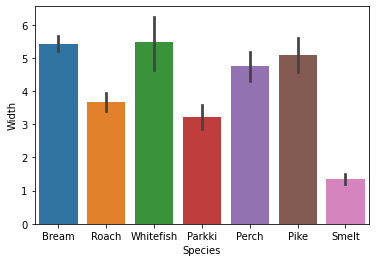

In [199]:
#whitefish has maximum width along side bream
sns.barplot(y=df['Width'],x=df['Species'])

<AxesSubplot:xlabel='Species', ylabel='Weight'>

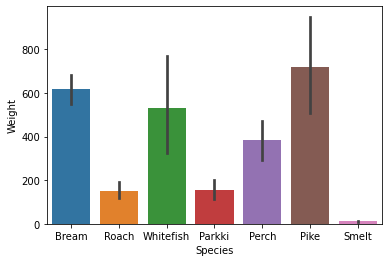

In [200]:
#Pike has maximum weight
sns.barplot(y=df['Weight'],x=df['Species']) 

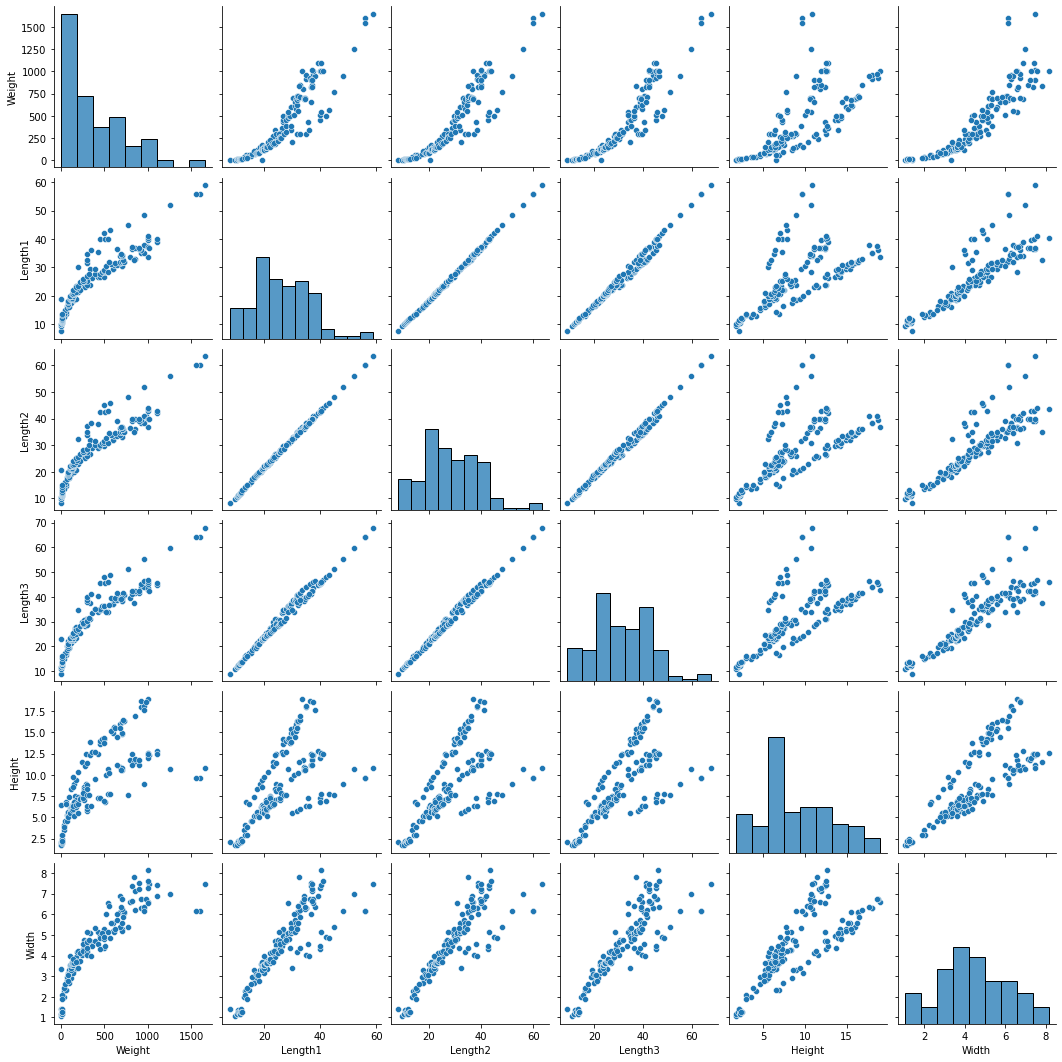

In [201]:
sns.pairplot(df) 

In [202]:
Fish = df['Species'].value_counts()
Fish = pd.DataFrame(Fish)
Fish

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


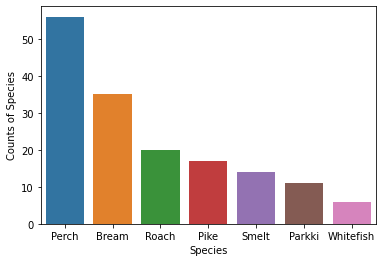

In [203]:
# Polting fish based on Value Count
sns.barplot(x=Fish.index,y=Fish['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [204]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [207]:
# Creating dummy variables for the catgeorical variable 
df['Perch']= np.where(df['Species']== 'Perch',1,0)
df['Bream']= np.where(df['Species']== 'Bream',1,0)
df['Roach']= np.where(df['Species']== 'Roach',1,0)
df['Pike']= np.where(df['Species']== 'Pike',1,0)
df['Smelt']= np.where(df['Species']== 'Smelt',1,0)
df['Parkki']= np.where(df['Species']== 'Parkki',1,0)
df['Whitefish']= np.where(df['Species']== 'Whitefish',1,0)

# Dropping Species column
df.drop(columns=["Species"], axis= 1, inplace = True)

In [208]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,1,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,1,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,1,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,1,0,0,0,0,0


In [275]:
dependent_variable = "Weight"

Independent_variables = ["Length3","Height","Perch"]

Independent_variables

['Length3', 'Height', 'Perch']

In [276]:
# Creating the data of independent variables
X = df[Independent_variables].values

# Creating the data of dependent variables

y =  df[dependent_variable].values

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [278]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
# Predicting the Test set results
reg_pred = reg.predict(X_test)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test, reg_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, reg_pred))

sqrt(Mean squared error): 134.42
Coefficient of determination: 0.87


In [ ]:
column_1 = df[""]
column_2 = df["c"]
correlation = column_1.corr(column_2)

In [215]:
dependent_variable = "Weight"

Independent_variables = df.columns.tolist()

Independent_variables.remove(dependent_variable)

Independent_variables


['Length1',
 'Length2',
 'Length3',
 'Height',
 'Width',
 'Perch',
 'Bream',
 'Roach',
 'Pike',
 'Smelt',
 'Parkki',
 'Whitefish']

In [232]:
# Creating the data of independent variables
X = df[Independent_variables].values

# Creating the data of dependent variables

y =  df[dependent_variable].values


In [233]:
# Splitting the data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [234]:
# Transforming Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
X_train[0:10]

array([[1.        , 1.        , 1.        , 0.45689145, 0.75523481,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.51958763, 0.51550388, 0.54347826, 0.24424503, 0.49447993,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.47216495, 0.47674419, 0.53442029, 0.76222096, 0.62799899,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.29896907, 0.30232558, 0.30253623, 0.3229862 , 0.39646715,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.4       , 0.39341085, 0.38586957, 0.33994637, 0.53167558,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.49484536, 0.50581395, 0.55978261, 0.80066285, 0.62721359,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ,

In [258]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
# Predicting the Test set results
#y_pred = reg.predict(X_test)

In [260]:
#math.sqrt(mean_squared_error(y_test, y_pred))

In [261]:
#r2_score(y_test, y_pred)

In [263]:
# Predicting the Test set results
reg_pred = reg.predict(X_test)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test, reg_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, reg_pred))

sqrt(Mean squared error): 130.72
Coefficient of determination: 0.91


In [186]:
# Predicting Weight for Perch
#df_Perch = df[df['Species'] == 'Perch']

# Predicting Weight for Bream
df_Bream = df[df['Species'] == 'Bream']

# Predicting Weight for Roach
#df_Roach = df[df['Species'] == 'Roach']

# Predicting Weight for Pike
#df_Pike = df[df['Species'] == 'Pike']
# Predicting Weight for Smelt
#df_Smelt = df[df['Species'] == 'Smelt']

# Predicting Weight for Parkki
#df_Parkki = df[df['Species'] == 'Parkki']

# Predicting Weight for Whitefish
#df_Whitefish = df[df['Species'] == 'Whitefish']


In [167]:
#all variables except Weight and Species
X = df.iloc[:,2:]

#Weight variable only
y = df['Weight']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [169]:

print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (127, 5)
y_train:  (127,)
X_test:  (32, 5)
y_test:  (32,)


In [170]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -460.12040856101544
Model coefficients:  [ 94.04820524 -56.76315065 -15.71473227  23.61782845  62.02493051]


In [172]:
y_head = reg.predict(X_train)

In [173]:
r2_score(y_train, y_head)

0.8860057867846995

In [174]:
y_pred = reg.predict(X_test)

In [175]:
df_y_test = pd.DataFrame(y_test)
df_y_test1 = df_y_test.reset_index(drop=True)
df_y_test1.head()

,Weight
0,1000.0
1,120.0
2,270.0
3,218.0
4,975.0


In [176]:
df_y_pred = pd.DataFrame(y_pred, columns=["Predicted weight"])
df_y_pred.head()

,Predicted weight
0,941.462978
1,148.691757
2,293.946447
3,373.172633
4,867.315574


In [177]:
df_y = pd.concat([df_y_test1, df_y_pred], axis=1)
df_y.head()

,Weight,Predicted weight
0,1000.0,941.462978
1,120.0,148.691757
2,270.0,293.946447
3,218.0,373.172633
4,975.0,867.315574


In [178]:
print(r2_score(y_test, y_pred))

0.8529757935817517


### Multiple Lineer Regression¶
### In this regression I will estimate the weight of Bream according to Length3 and Body Depth

The formula for this type of regression is:

y = b0 + b1x1 + b2x2

y: Dependent (Target variable)

b0: constant

b1,b2: coefficient
X1,X2: Independent variables

In [113]:
# Dependant Var
y = df_Bream['Weight']
X = df_Bream.iloc[:,[2,5,6]]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
regr = LinearRegression().fit(X_train,y_train)
regr_pred_fish = regr.predict(X_test)

In [115]:
print('Samples in the test and train datasets are:')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Samples in the test and train datasets are:
X_train:  (26, 3)
y_train:  (26,)
X_test:  (9, 3)
y_test:  (9,)


In [116]:
print('Intercept:', regr.intercept_)
print('Slopes:', regr.coef_)

Intercept: -1005.7045528712805
Slopes: [ 9.46825416 72.72985485 42.67435863]


In [92]:
y_predict  = regr.predict(X_test)

In [93]:
# To display y and predicted y variables in a dataframe 
data = pd.DataFrame(data=y_test,columns=['y_test'])
data['y_predict'] = y_predict
data

,y_test,y_predict
0,NaN,747.157763
1,NaN,642.931944
2,NaN,743.562782
3,NaN,716.008953
4,NaN,588.476164
5,NaN,580.954034
6,NaN,628.620252
7,NaN,584.910356
8,NaN,312.940854


In [94]:
regr_Price_pred = regr.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, regr_Price_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, regr_Price_pred))

Mean squared error: 50.40
Coefficient of determination: 0.84


### Correlation study

The next objective is to find out which variables correlates best. A correlational study is a type of research design where one seeks to understand what kind of relationships naturally occurring variables have with one another.

The following code allows to see a graph that links the previous variables together with the closing value.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

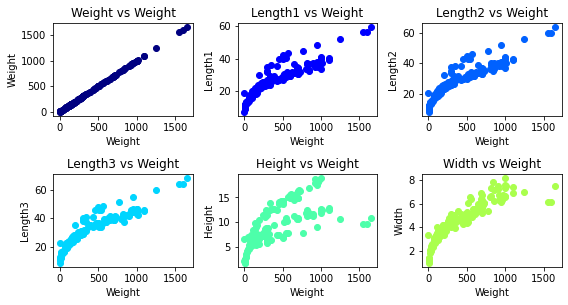

In [105]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation_plot(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Weight"], asset, c = next(colors))
        ax.set_xlabel("Weight")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Weight")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 7 columns of the Fish_data which are the model features
variables = df.columns[-6:]  
 
correlation_plot(df,variables,3,3)

<AxesSubplot:ylabel='Weight'>

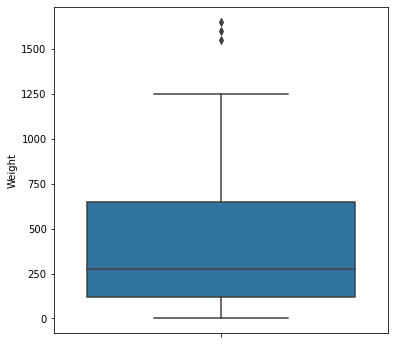

In [40]:
# Checking for outliers

plt.figure(figsize=(6,6))
sns.boxplot(y=df['Weight']) 

In [134]:
#kendall correlation
df.corr(method='kendall')['Weight'].loc[variables]

Weight     1.000000
Length1    0.850766
Length2    0.857476
Length3    0.867304
Height     0.689884
Width      0.856201
Name: Weight, dtype: float64

In [193]:
#spearman correlation
df.corr(method='spearman')['Weight'].loc[variables]

Weight     1.000000
Length1    0.956571
Length2    0.958990
Length3    0.964101
Height     0.858628
Width      0.970369
Name: Weight, dtype: float64

In [118]:
#pearson correlation
df.corr(method='pearson')['Weight'].loc[variables]

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

In [41]:
# Z-score analysis
z = np.abs(stats.zscore(df.drop('Species',axis=1)))
threshold=3
print(np.where(z>3))
print('\n')
print(np.where(z<-3)) ## caught some outliers, here i have their indexes  

(array([142, 143, 144, 144, 144, 144]), array([0, 0, 0, 1, 2, 3]))


(array([], dtype=int64), array([], dtype=int64))


In [42]:
#IQR analysis
df_= df.drop('Species',axis=1)
Q1 =df_.quantile(0.25)
Q3 = df_.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


In [43]:
df_ = df_[(z < 3).all(axis=1)]

In [44]:
df_out = df_[~((df_ < (Q1 - 1.5 * IQR)) |(df_ > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(156, 6)

<AxesSubplot:ylabel='Weight'>

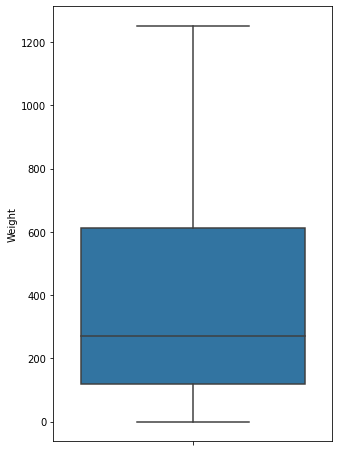

In [45]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df_out['Weight']) ## fair enough 

## Getting the X and y for the training of the logistic regression in x exculding the species coloumn from df and y includes the species.

In [46]:
X= df.drop('Species',axis=1)
y = (df['Species'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

In [57]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = model.predict(X_test)

In [59]:
model.score(X_test,y_test)

0.875

In [51]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_new

,Actual,Predicted
78,Perch,Perch
155,Smelt,Smelt
128,Pike,Pike
55,Whitefish,Perch
94,Perch,Perch
29,Bream,Bream
147,Smelt,Smelt
51,Roach,Perch
98,Perch,Perch
141,Pike,Pike


In [179]:
df["Volume"]= df["Length2"]*df["Width"]*df["Height"]
df.loc[df["Volume"].idxmax()]

Species          Bream
Weight           975.0
Length1           37.4
Length2           41.0
Length3           45.9
Height         18.6354
Width           6.7473
Volume     5155.284011
Name: 33, dtype: object